# 서울시 구별 CCTV 현황 분석

## 1. CCTV현황과 인구현황 데이터를 구하고 정제하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [6]:
# cctv 자료 불러오기

cctv_seoul = pd.read_csv('data/seoul/cctv.csv')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [9]:
# 컬럼명 중에 기관명을 구별로 변경

cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)  #inplace=True : 원본에까지 바로 수정
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [11]:
# 인구 데이터 불러오기

#pop_seoul = pd.read_excel('data/seoul/Report.xls')
pop_seoul = pd.read_excel('data/seoul/Report.xls', header=2, usecols="B, D, G, J, N")
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


In [13]:
# 인구 데이터 컬럼명 변경

pop_seoul.rename(columns={
    pop_seoul.columns[0]:'구별', pop_seoul.columns[1]:'인구수', pop_seoul.columns[2]:'한국인',
    pop_seoul.columns[3]:'외국인', pop_seoul.columns[4]:'고령자'
}, inplace=True)

pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


## 2. 데이터 파악하기

In [16]:
# cctv 데이터에서 소계를 기준으로 정렬(오름차순)

cctv_seoul.sort_values(by='소계', ascending=True).head()
cctv_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [20]:
# 증가율((2014+2015+2016)/2013이전)을 구해서 "최근증가율"이란 컬럼으로 추가
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년'] + cctv_seoul['2014년'])/cctv_seoul['2013년도 이전']*100
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [21]:
# 인구데이터에서 첫번째 행을 삭제

pop_seoul.head()
pop_seoul.drop([0], inplace=True)

In [22]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [23]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [24]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [27]:
pop_seoul.sort_values(by='인구수', ascending=True).head()
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자
24,송파구,671994,665282,6712,77978
16,강서구,608361,601696,6665,77381
23,강남구,557865,552976,4889,65859
11,노원구,555803,551902,3901,75081
21,관악구,522292,504445,17847,70807


In [28]:
# 외국인비율, 고령자비율 컬럼을 추가
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] *100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] *100

In [30]:
pop_seoul.sort_values(by='외국인', ascending=True).head()
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671994,665282,6712,77978,0.998818,11.603973
16,강서구,608361,601696,6665,77381,1.095567,12.719586
12,은평구,490253,485902,4351,75535,0.887501,15.407351
11,노원구,555803,551902,3901,75081,0.701867,13.508563
21,관악구,522292,504445,17847,70807,3.417054,13.556976


## 3. CCTV데이터와 인구데이터를 합치고 분석하기

In [31]:
data_result = pd.merge(cctv_seoul, pop_seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [32]:
# 컬럼 삭제 : drop(행삭제), del(열삭제)  => 불필요한 컬럼을 삭제

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [33]:
# 구별 컬럼을 인덱스로 설정
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [41]:
print(np.corrcoef(data_result["고령자비율"], data_result["소계"]))
print('===========================')
print(np.corrcoef(data_result["외국인비율"], data_result["소계"]))
print('===========================')
print(np.corrcoef(data_result["인구수"], data_result["소계"]))


[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


In [42]:
data_result.sort_values(by="소계", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
은평구,2108,85.237258,490253,485902,4351,75535,0.887501,15.407351


In [43]:
data_result.sort_values(by="인구수", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


## 4. CCTV현황 데이터로 그래프 분석

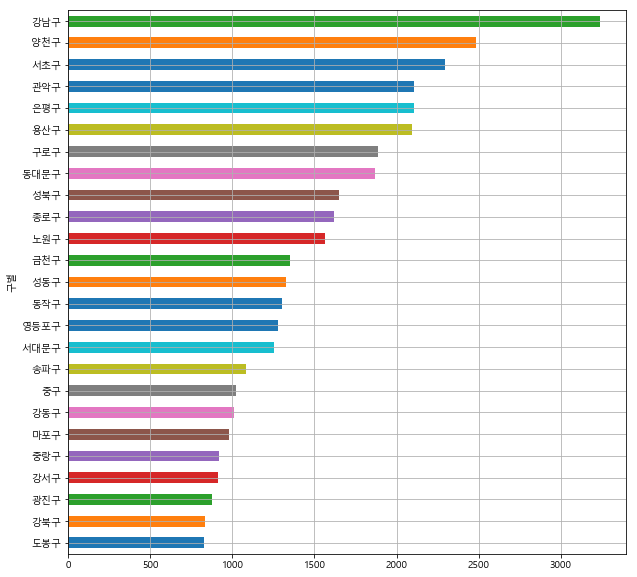

In [55]:
# data_result["소계"].plot(kind="barh", figsize=(10, 10), grid=True)
data_result["소계"].sort_values().plot(kind="barh", figsize=(10, 10), grid=True)

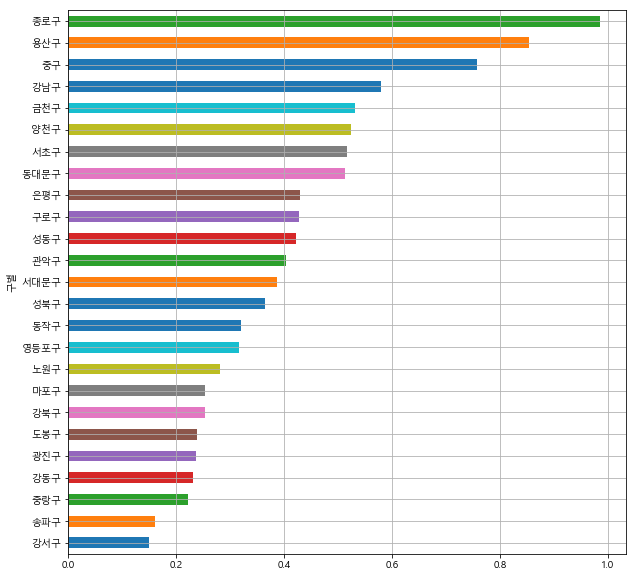

In [58]:
# cctv 비율
data_result['cctv비율'] = data_result['소계']/data_result['인구수']*100
data_result.head()
data_result["cctv비율"].sort_values().plot(kind="barh", figsize=(10, 10), grid=True)

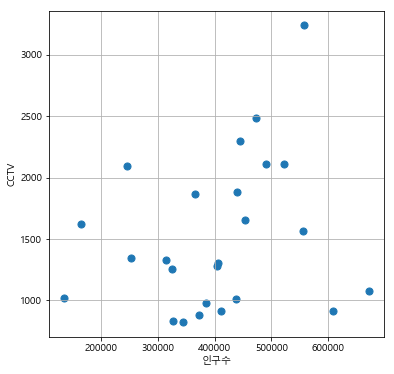

In [60]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

### 통계분석
    평균 차이 검정
        - 집단의 갯수
            2개 이하 : T-test
            3개 이상 : ANOVA
            
    관계 검정
        명목 : 교차분석
        1:1 : 상관분석
        1:N : 회귀분석
        

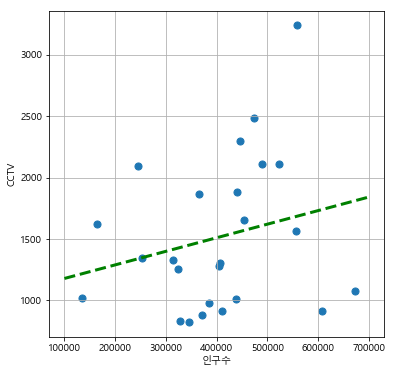

In [67]:
# 회귀선 작성(y = ax +b)

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

f1 = np.poly1d(fp1) # 방정식
fx = np.linspace(100000, 700000, 100) # x 좌표값

plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), lw=3, color="g", ls='dashed')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

In [72]:
# poly1d

a = np.poly1d([1,2])
print(a)

b = np.poly1d([1,2,3])
print(b)

 
1 x + 2
   2
1 x + 2 x + 3


In [74]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790


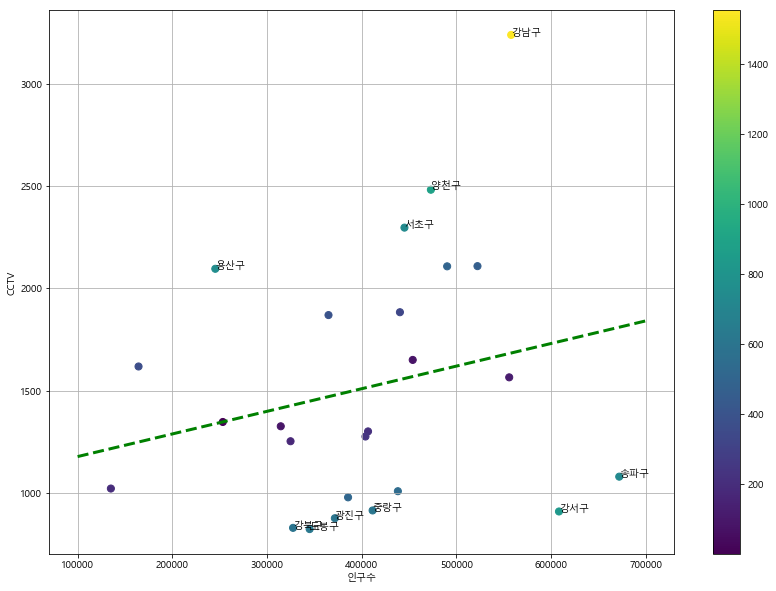

In [80]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'])
plt.plot(fx, f1(fx), lw=3, color="g", ls='dashed')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.colorbar()

for n in range(10):
    plt.text(df_sort['인구수'][n], df_sort['소계'][n], df_sort.index[n], fontsize=10)

In [81]:
# 지금까지 작업을 파일로 저장
df_sort.to_csv("data/seoul/cctv_result.csv", sep=",", encoding="utf-8")